CUSTOMER CHURN ANALYSIS

Since, this is a classification project, we import necessary libraries required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier

Import Dataset from GitHub

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Now, we can begin analysing our dataset:

- Check shape
- General Info
- Stats
- Null Values
- Duplicates

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df = df.drop_duplicates()
df.shape

(7043, 21)

No Nulls or Duplicates in our Dataset

Convert target column to binary float values

In [7]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
ch = []
for i in df['Churn']:
    if i == 'No':
        ch.append(0)
    else:
        ch.append(1)
        
df['Churn']=ch
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


Now, Let's convert our categorical columns to float using label encoder

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [11]:
for i in categorical_columns:
    print(df[i].unique())

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lab = LabelEncoder()

In [14]:
for i in categorical_columns:
    df[i] = lab.fit_transform(df[i])
    
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.6,1


In [15]:
df = df.drop(columns = ['customerID'],axis = 1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.5,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.9,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.6,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


Remove object rows from TotalCharges column to make it float

In [22]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [23]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  


In [24]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


Now that we have cleaned our dataset, we are ready to now begin visualizing it

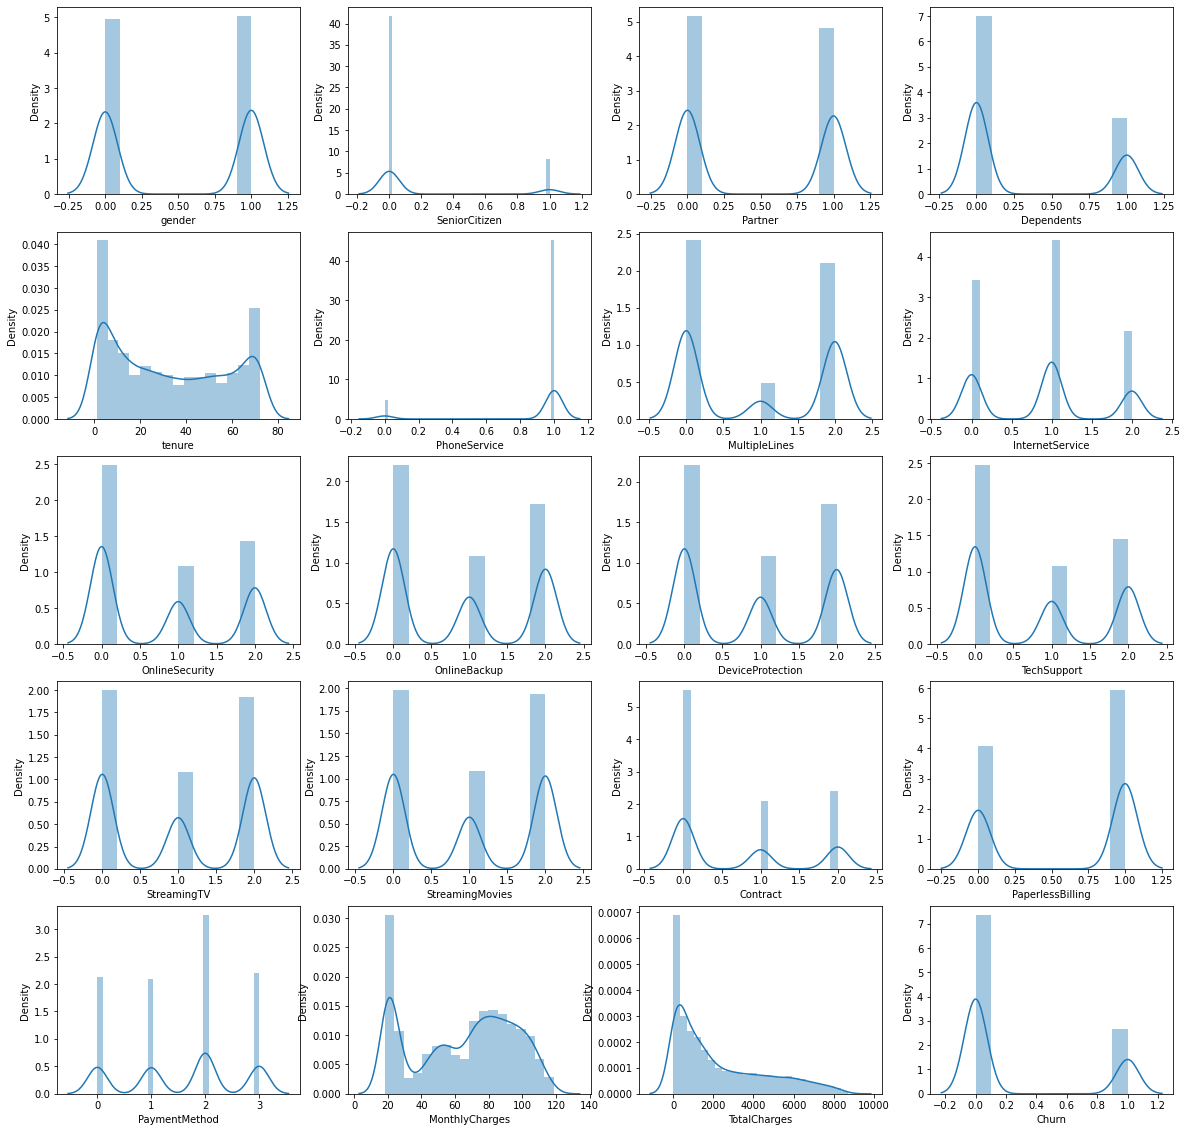

In [25]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

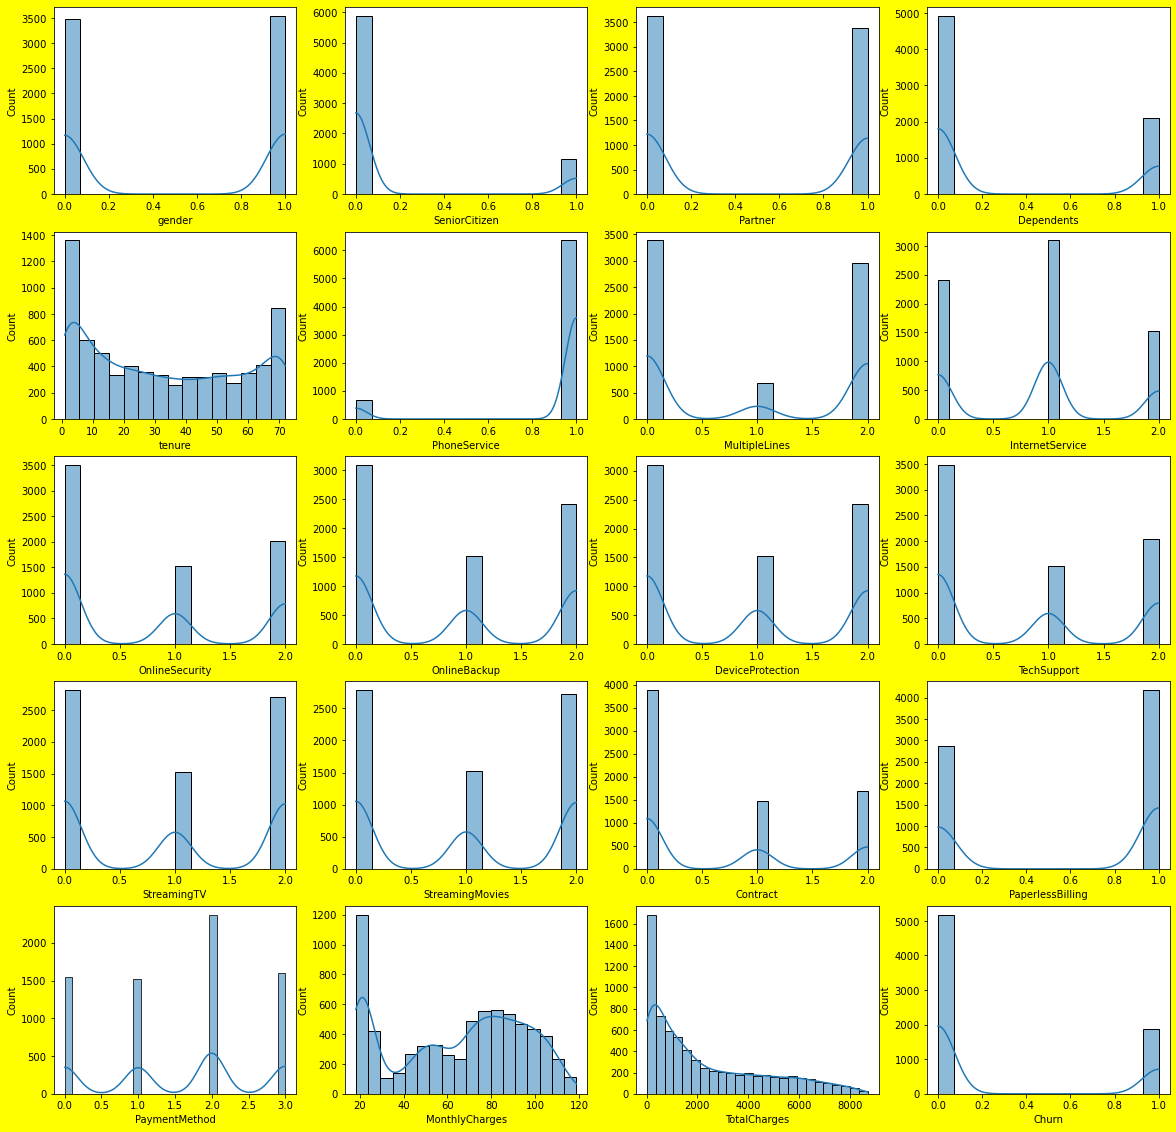

In [28]:
plt.figure(figsize=(20,20), facecolor = 'yellow')
plotnumber=1
for column in df:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.histplot(x=column,data=df,kde=True)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

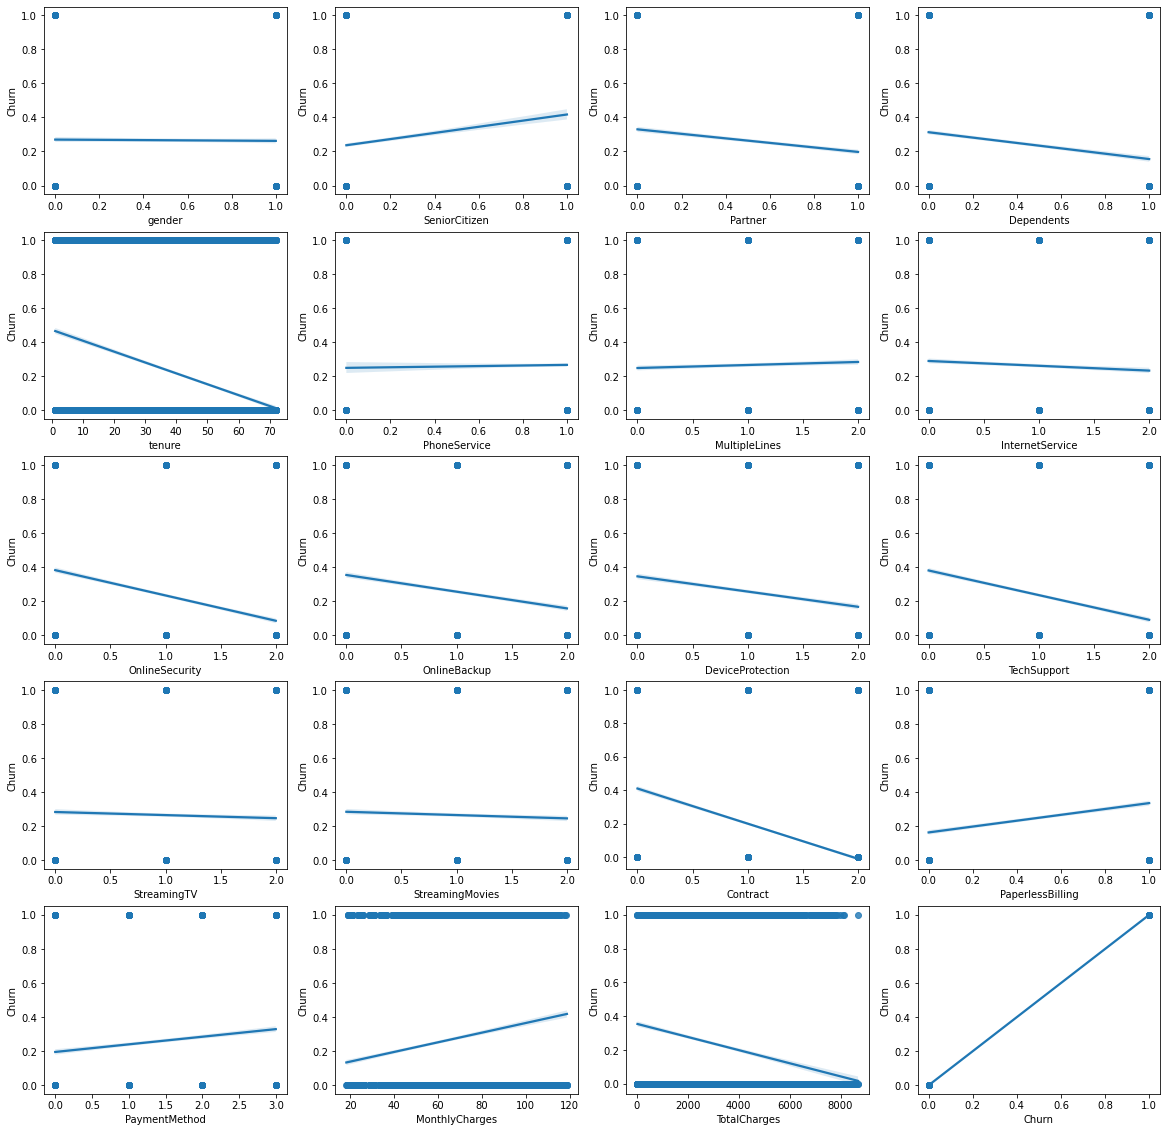

In [29]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.regplot(x=column,y='Churn',data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

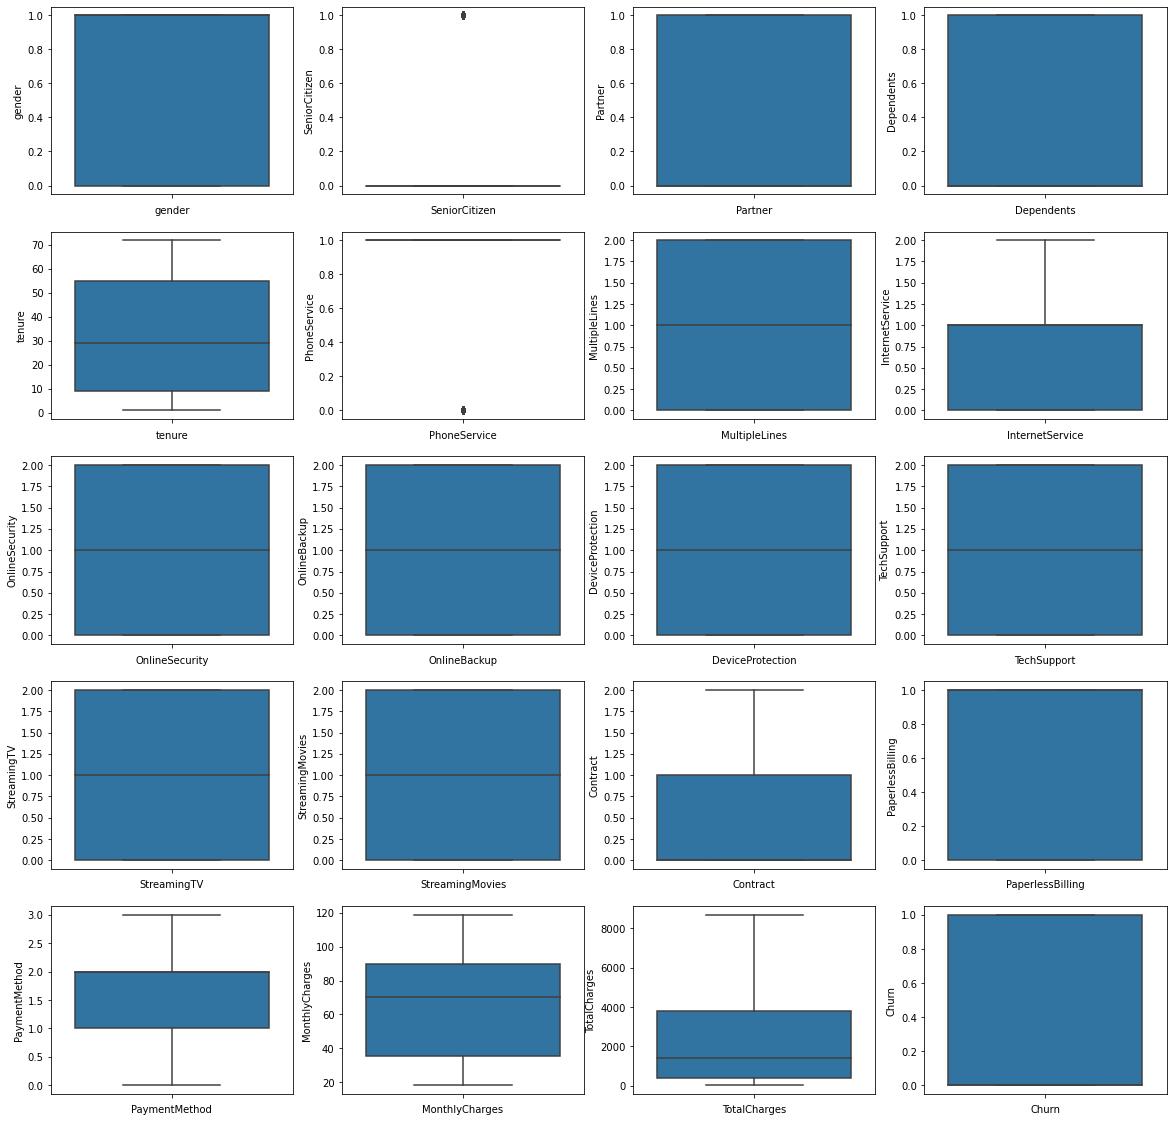

In [30]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(y=column,data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()


I do not see any need for removing any outliers from our dataset

Let's check the heatmap for any multi-collinearity problems

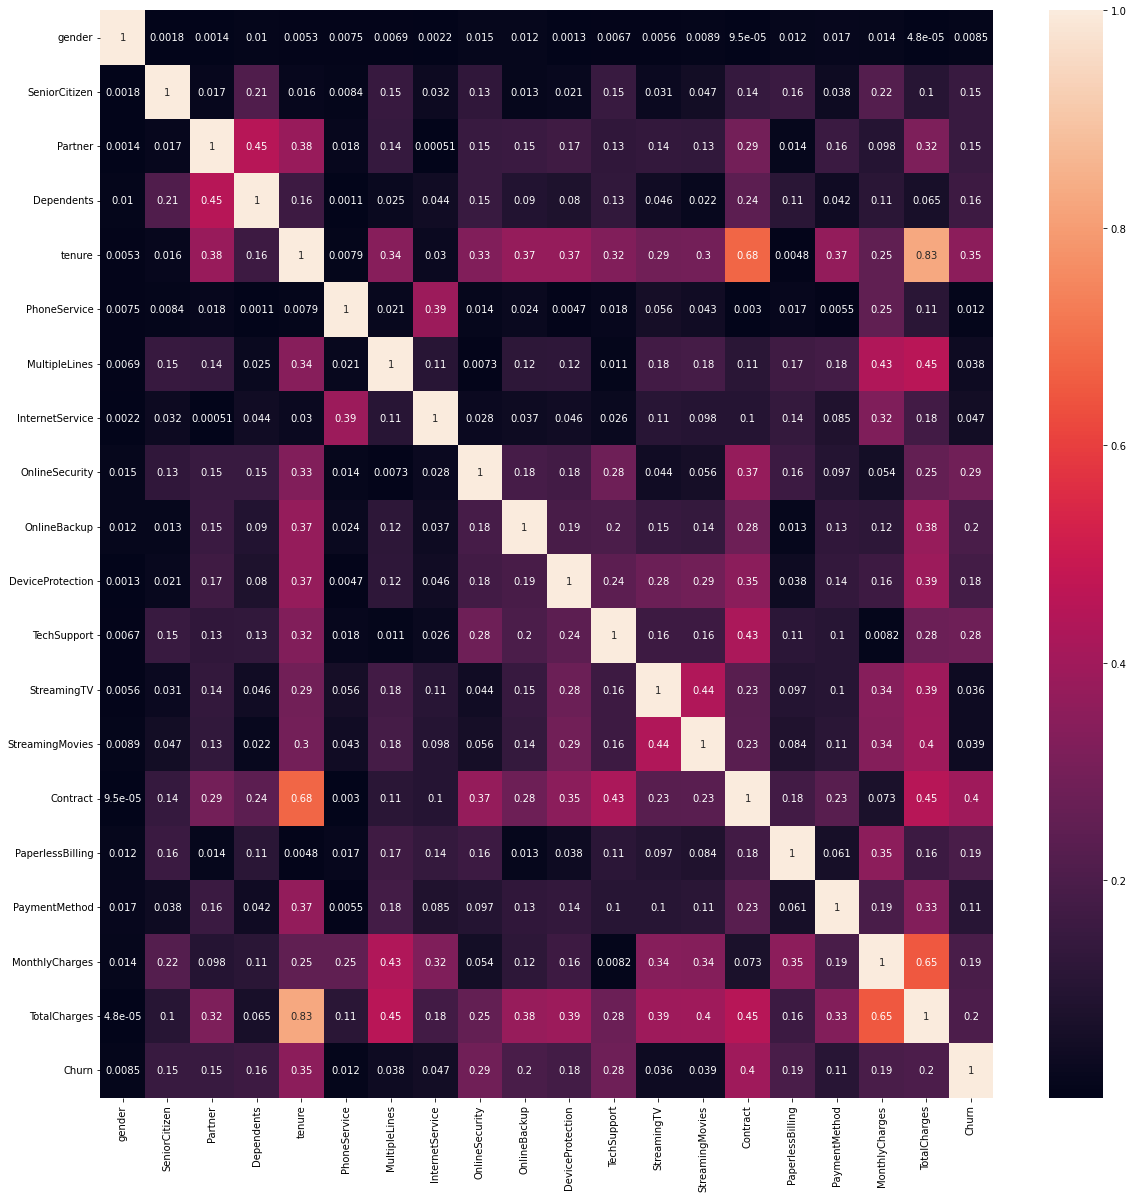

In [31]:
df_corr = df.corr().abs()

plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot = True)
plt.show()

We see high collinearity between tenure and TotalCharges, let's confirm this using Scatter Plot

<function matplotlib.pyplot.show(close=None, block=None)>

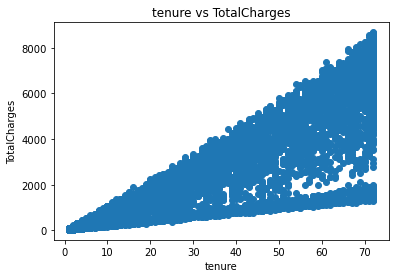

In [32]:
plt.scatter(df['tenure'], df['TotalCharges'])
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.title('tenure vs TotalCharges')
plt.show

They are certainly collinear but we do not need to drop any columns here.

In [33]:
df.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
Churn               1.060622
dtype: float64

Let's seperate our dataset into featires and target columns

In [34]:
x = df.drop(columns = ['Churn'])
y = df.Churn

In [35]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [36]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

Using Select Percentile to select best features

In [38]:
from sklearn.feature_selection import SelectPercentile, chi2

In [39]:
SPercentile = SelectPercentile(score_func = chi2,percentile = 85)
SPercentile = SPercentile.fit(x,y)

In [40]:
cols = SPercentile.get_support(indices=True)
print('Feature Index: ',cols)

features = x.columns[cols]
print('Features: ',list(features))

Feature Index:  [ 1  2  3  4  6  7  8  9 10 11 13 14 15 16 17 18]
Features:  ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [41]:
df_scores = pd.DataFrame({'features':x.columns,'Chi2Score':SPercentile.scores_, 'pValue':SPercentile.pvalues_})

df_scores.sort_values(by = 'Chi2Score',ascending = False)

,features,Chi2Score,pValue
18,TotalCharges,629630.810349,0.000000e+00
4,tenure,16377.328093,0.000000e+00
17,MonthlyCharges,3653.074681,0.000000e+00
14,Contract,1111.759054,9.186154e-244
8,OnlineSecurity,550.437364,1.011220e-121
11,TechSupport,522.164716,1.430807e-115
9,OnlineBackup,229.441123,7.892689e-52
10,DeviceProtection,190.688004,2.249863e-43
1,SeniorCitizen,133.482766,7.089546e-31
3,Dependents,131.271509,2.159540e-30


In [42]:
x = df[features]
y = df.Churn

In [43]:
x

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,1,0,0,2,0,0,0,0,1,2,29.85,29.85
1,0,0,0,34,0,0,2,0,2,0,0,1,0,3,56.95,1889.50
2,0,0,0,2,0,0,2,2,0,0,0,0,1,3,53.85,108.15
3,0,0,0,45,1,0,2,0,2,2,0,1,0,0,42.30,1840.75
4,0,0,0,2,0,1,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,2,0,2,0,2,2,2,1,1,3,84.80,1990.50
7039,0,1,1,72,2,1,0,2,2,0,2,1,1,1,103.20,7362.90
7040,0,1,1,11,1,0,2,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,0,4,2,1,0,0,0,0,0,0,1,3,74.40,306.60


In [44]:
x.skew()

SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
dtype: float64

Use Power Transformer to reduce skewness

In [45]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [46]:
x_scaled = scaler.fit_transform(x.values)
x_scaled

array([[-0.44032709,  1.03561683, -0.65230493, ...,  0.4110058 ,
        -1.15999612, -1.81006854],
       [-0.44032709, -0.9656081 , -0.65230493, ...,  1.32047796,
        -0.24134546,  0.25425652],
       [-0.44032709, -0.9656081 , -0.65230493, ...,  1.32047796,
        -0.34453193, -1.38609098],
       ...,
       [-0.44032709,  1.03561683,  1.53302536, ...,  0.4110058 ,
        -1.16868516, -0.85839282],
       [ 2.27103902,  1.03561683, -0.65230493, ...,  1.32047796,
         0.33273687, -0.92147688],
       [-0.44032709, -0.9656081 , -0.65230493, ..., -1.48978043,
         1.33845304,  1.48336977]])

Now, for accurate predictions, we need to balance our target variable

Check balance using Counter

In [47]:
from collections import Counter
Counter(y)

Counter({0: 5163, 1: 1869})

We can see our target variable is highly imbalanced and we need to balance it

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
x_train1,x_test,y_train1,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [50]:
Counter(y_train1)

Counter({1: 1495, 0: 4130})

In [51]:
sm = SMOTE(sampling_strategy=0.85)

In [52]:
x_train,y_train = sm.fit_resample(x_train1,y_train1)

print('Classes before fit{} '.format(Counter(y_train1)))
print('Classes after fit{} '.format(Counter(y_train)))

Classes before fitCounter({0: 4130, 1: 1495}) 
Classes after fitCounter({0: 4130, 1: 3510}) 


Now that we have balanced our target variable, we can begin Model Training and Testing

In [53]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [54]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
    elif train == False: 
        pred= clf.predict(x_test)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%')
        print('\n \n TEST CLASSIFICATION REPORT \n', classification_report(y_test,pred,digits =2))

In [55]:
metric_score(lr,x_train,x_test,y_train,y_test,train = True)
metric_score(lr,x_train,x_test,y_train,y_test,train = False)


 ======TRAINING RESULT======
Accuracy Score: 77.60%

 ======TESTING RESULT======
Accuracy Score: 76.05%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.89      0.77      0.82      1033
           1       0.54      0.74      0.62       374

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.76      0.77      1407



In [56]:
pred = lr.predict(x_test)

Confusion Matrix

In [57]:
conf_matrix = confusion_matrix(y_test,pred)
conf_matrix

array([[794, 239],
       [ 98, 276]], dtype=int64)

We can note that we are getting training accuracy of 77.60% and Testing accuracy of 76.05% with Logistic Regression model

We should now test the data on other models as well to check which model is giving us the best result

In [58]:
from sklearn.svm import SVC

In [59]:
knn = KNeighborsClassifier()
dec = DecisionTreeClassifier()
ran = RandomForestClassifier()
svc = SVC()
xgb = XGBClassifier()

In [60]:
#TRAINING THE MODELS
knn.fit(x_train,y_train)
dec.fit(x_train,y_train)
ran.fit(x_train,y_train)
svc.fit(x_train,y_train)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Check Training Accuracies for other models:

In [61]:
print(lr.score(x_train,y_train))
print(knn.score(x_train,y_train))
print(dec.score(x_train,y_train))
print(ran.score(x_train,y_train))
print(svc.score(x_train,y_train))
print(xgb.score(x_train,y_train))

0.7760471204188482
0.8649214659685864
0.9980366492146597
0.9980366492146597
0.818717277486911
0.9404450261780105


Check Testing Accuracies for other models:

In [62]:
print(lr.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(dec.score(x_test,y_test))
print(ran.score(x_test,y_test))
print(svc.score(x_test,y_test))
print(xgb.score(x_test,y_test))

0.7604832977967306
0.7178393745557925
0.7228144989339019
0.7725657427149965
0.7526652452025586
0.7604832977967306


Now that we have checked the accuracy for all models, we should plot the ROC-AUC curve to check the best fit model

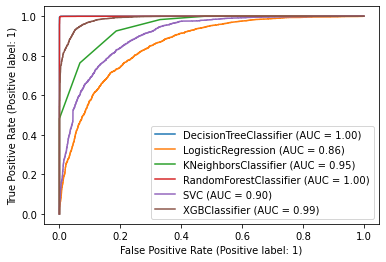

In [63]:
#CHECK ROC AUC CURVE FOR TRAINING

disp = plot_roc_curve(dec,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(ran,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(xgb,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

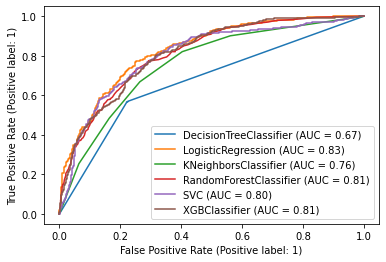

In [64]:
#ROC-AUC CURVE FOR TESTING
disp = plot_roc_curve(dec,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ran,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

Best Perfoming Models: Logistic Regression by some margin

- All models give very similar testing accuracy
- Log Reg gives the least Testing accuracy but the model is not overfitting
- Other models give higher testing accuracy but similar or lesser Testing accuracy than Log Reg, Thus they are overfitting
- ROC-AUC Curve also suggests Log Reg as the best model

Let's perform some hyperparameter tuning to try and increase the model performance further

In [65]:
params = {'solver':['lbfgs','saga'],
         'penalty':['none','l2'],
         'C':[0.1,1,10],
        }

In [66]:
grid = GridSearchCV(lr, param_grid = params, n_jobs=-1)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'penalty': ['none', 'l2'],
                         'solver': ['lbfgs', 'saga']})

In [67]:
print('best parameters: ',grid.best_params_)

best parameters:  {'C': 0.1, 'penalty': 'none', 'solver': 'lbfgs'}


In [68]:
lr_grid = grid.best_estimator_
lr_grid.fit(x_train,y_train)

LogisticRegression(C=0.1, penalty='none')

In [69]:
metric_score(lr_grid,x_train,x_test,y_train,y_test,train = True)
metric_score(lr_grid,x_train,x_test,y_train,y_test,train = False)


 ======TRAINING RESULT======
Accuracy Score: 77.71%

 ======TESTING RESULT======
Accuracy Score: 76.05%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.89      0.77      0.82      1033
           1       0.54      0.74      0.62       374

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.76      0.77      1407



We get the same result for both Training and Testing Accuracy with HyperParameter Tuning

Thus, we continue with our original Logistic Regression